## Gradient Descent

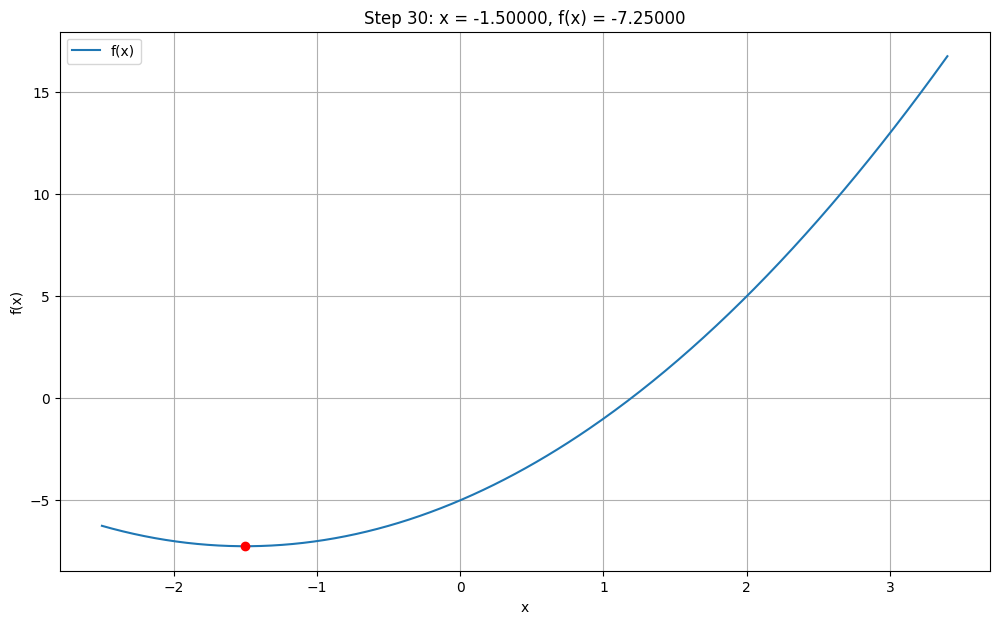

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Create function and its gradient
def f(x):
    return x**2 + 3 * x - 5

def gradient_f(x):
    return 2 * x + 3

def gradient_descent_path(gradient, x_init, alpha, max_iters=100, precision=1e-8):
    x = x_init
    path = [x]
    for _ in range(max_iters):
        grad = gradient(x)
        if abs(grad) < precision:
            break
        x = x - alpha * grad
        path.append(x)
    return path

x_init = 2.4
alpha = 0.25
path = gradient_descent_path(gradient_f, x_init, alpha)

x_vals = np.linspace(min(path) - 1, max(path) + 1, 400)
y_vals = f(x_vals)

# create the figure
fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(x_vals, y_vals, label="f(x)")
point, = ax.plot([], [], 'ro')  # Red dot for current point
title = ax.set_title("")
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
ax.grid(True)
ax.legend()

def update(i):
    x = path[i]
    point.set_data([x], [f(x)])  # Wrap scalars in lists
    title.set_text(f"Step {i}: x = {x:.5f}, f(x) = {f(x):.5f}")
    return point, title



ani = FuncAnimation(fig, update, frames=len(path), interval=400, blit=False)

ani.save("gradient_descent.gif", writer=PillowWriter(fps=2))

plt.show()